In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from matplotlib.backends.backend_pdf import PdfPages

# Set constants

## Submission

In [2]:
RUN_CODE = 1
SUBTASK_CODE = 'category'  #category #subcategory 
FIG_SIZE = (23,8) #23,8 #23,8

## Paths

In [3]:
dir_data = os.path.join('..', 'data')
dir_plots = os.path.join('..', 'plots')

# Prepare data

## Read result data

In [4]:
file_true = os.path.join(dir_data, 'true_test', 'FinNum_test_all_with_GS.json')

In [5]:
data_true = json.load(open(file_true))

## Read submission data

In [6]:
file_submission = os.path.join(dir_data, 'submission', 'BRNIR_%s.json' % RUN_CODE)

In [7]:
data_submission = json.load(open(file_submission,'r'))

## Merge data

In [8]:
data = {}
# id => {submitted: [strings], true: [strings]}
for twit in data_true:
    data[twit['idx']] = {
        'true': twit[SUBTASK_CODE]
    }
for twit in data_submission:
    if twit['idx'] not in data:
        print('Twit %s is missing in the sumsission RUN %s, subtask %s' % (twit['idx'], RUN_CODE, SUBTASK_CODE))
        continue
    
    data[twit['idx']]['submitted'] = twit[SUBTASK_CODE]

In [9]:
class_names = []
classes_2_id = {}

for twit in data.values():
    for y in twit['true']:
        if y not in classes_2_id:
            classes_2_id[y] = len(classes_2_id)
            class_names.append(y.capitalize())

In [10]:
classes_2_id

{'Monetary': 0,
 'Quantity': 1,
 'Percentage': 2,
 'Temporal': 3,
 'Product Number': 4,
 'Indicator': 5,
 'Option': 6}

In [11]:
list_true = []
list_submitted = []
for twit in data.values():
    for y in twit['true']:
        list_true.append(classes_2_id[y])
    for y in twit['submitted']:
        list_submitted.append(classes_2_id[y])
        
y_true = np.array(list_true).astype(int)
y_submitted = np.array(list_submitted).astype(int)

# Compute and plot confusion matrix

In [12]:
def plot_confusion_matrix(ax, y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #print(cm)

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Extra love for axis
    ax.set_xticklabels(classes, rotation=45, fontsize=14, rotation_mode='anchor', va='top', ha='right')
    ax.set_yticklabels(classes, rotation=0, fontsize=14)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax

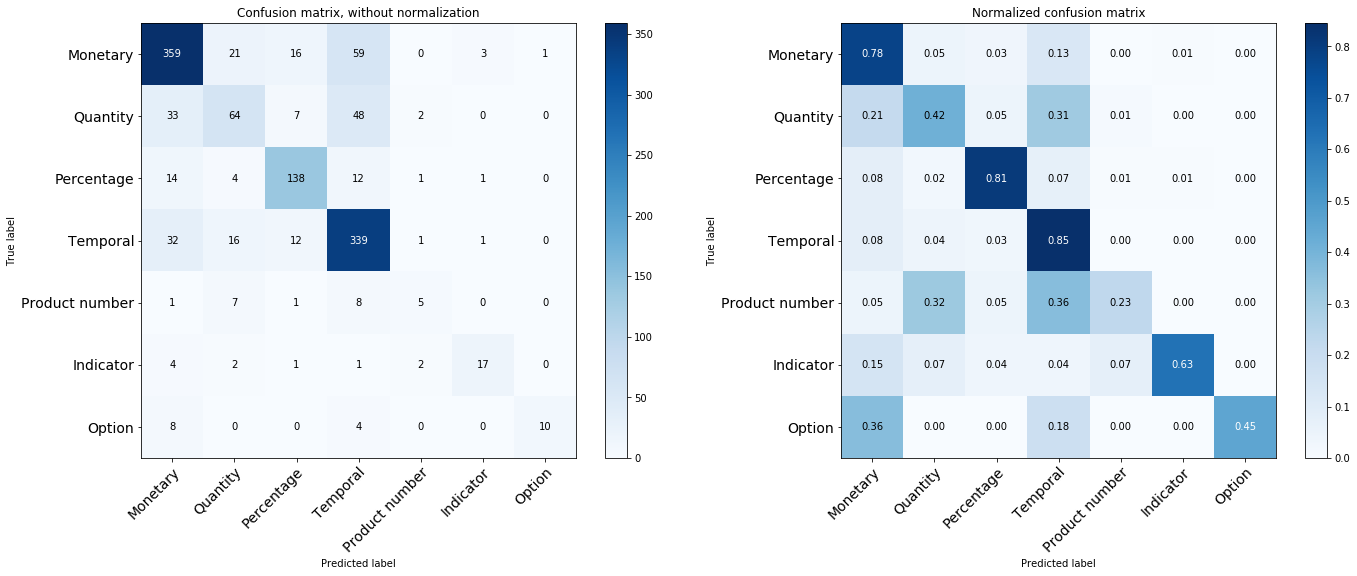

In [13]:
np.set_printoptions(precision=2)
fig, ax = plt.subplots(1, 2, figsize=FIG_SIZE)

plot_confusion_matrix(ax[0], y_true, y_submitted, classes=class_names, normalize=False,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(ax[1], y_true, y_submitted, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

pp = PdfPages(os.path.join(dir_plots, 'consusion_matrix_run-%s_subtask-%s.pdf' % (RUN_CODE, SUBTASK_CODE)))
plt.savefig(pp, format='pdf', bbox_inches='tight')
pp.close()
plt.show()